In [4]:
import os
import cv2
from sklearn.model_selection import train_test_split
import numpy as np

In [5]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
!ls "/content/drive/My Drive/"

'1000 redspot physics-1.pdf'
 4574-2.jpg
 4574-2.png
'All the Lectures'
 Anwar_Shameen_CV.pdf
'Biodiversity grading.gform'
'Biodiversity grading (Responses).gsheet'
'biodiversity oht 1.gform'
'Biodiversity quiz 3.gform'
"Biodiversity's lab exam.gform"
'Biodiversity'\''s lab exam (Responses).gsheet'
"Biodiversity's lectures.gform"
"biodiversity's second quiz.gform"
'Bioinformatics class.gform'
 biology
"Biophysics' presentation.gform"
'Biostatics class.gform'
'biostatics .gform'
'Biotechnology debate groups.gsheet'
'Cell biology presentation groups.gsheet'
 chemistry
'CIS assignment.gform'
"CIS blog assignment's groups.gsheet"
 Code_ERa_nbk.gdoc
'Colab Notebooks'
 COVID-19.gform
 data1.cab
 data1.hdr
'Defence classes.gform'
'Defense_UG FYP Grp 3 (1).pptx'
'Defense_UG FYP Grp 3.pptx'
'Feedback Form.gform'
'File nghe MP3 bài tập HSK 1.7z'
'General genetics finals.gform'
'General genetics groups.gsheet'
"General genetic's quiz timing.gform"
'General genetics quiz timing.gform'
'Genetics

In [7]:
import pathlib

amaranthus_path = pathlib.Path('/content/drive/MyDrive/weed/amaranthus_viridai/amaranthus_viridai')

# Count files with .jpg and .jpeg extensions
jpg_files = list(amaranthus_path.glob('*.jpg'))
jpeg_files = list(amaranthus_path.glob('*.jpeg'))
png_files = list(amaranthus_path.glob('*.png'))
webp_files = list(amaranthus_path.glob('*.webp'))  # Convert generator to list
count = len(jpg_files) + len(jpeg_files) + len(png_files) + len(webp_files)

print(f"Total: {count}")

Total: 400


In [8]:
amaranthus_folder = '/content/drive/MyDrive/weed/amaranthus_viridai/amaranthus_viridai'
anagallis_folder = '/content/drive/MyDrive/weed/anagallis_arvensis/anagallis_arvensis'
asphodelus_folder = '/content/drive/MyDrive/weed/asphodelus_tenuifolius/asphodelus_tenuifolius'


In [9]:
import pathlib
anagallis_path = pathlib.Path(anagallis_folder)
jpg_files = list(anagallis_path.glob('*.jpg'))
png_files = list(amaranthus_path.glob('*.png'))
jpeg_files = list(anagallis_path.glob('*.jpeg'))
webp_files = list(amaranthus_path.glob('*.webp'))  # Convert generator to list
count = len(jpg_files) + len(jpeg_files) + len(png_files) + len(webp_files)

print(f"Total: {count}")

Total: 411


In [10]:
import pathlib
asphodelus_path = pathlib.Path(asphodelus_folder)
jpg_files = list(asphodelus_path.glob('*.jpg'))
png_files = list(amaranthus_path.glob('*.png'))
jpeg_files = list(asphodelus_path.glob('*.jpeg'))
webp_files = list(amaranthus_path.glob('*.webp'))  # Convert generator to list
count = len(jpg_files) + len(jpeg_files) + len(png_files) + len(webp_files)

print(f"Total: {count}")

Total: 402


In [11]:
# Function to load images and labels from a folder
def load_images_and_labels(folder_path, label):
  images = []
  labels = []
  for filename in os.listdir(folder_path):
    img_path = os.path.join(folder_path, filename)
    if img_path.endswith(".jpg") or img_path.endswith(".jpeg"):
      img = cv2.imread(img_path)
      img = cv2.resize(img, (125, 125)) # Resize image to (125, 125)
      images.append(img)
      labels.append(label)
  return images, labels


In [12]:
# Load images and labels for each weed type
anagallis_images, anagallis_labels = load_images_and_labels(anagallis_folder, 0) # Label 0 for anagallis
asphodelus_images, asphodelus_labels = load_images_and_labels(asphodelus_folder, 1) # Label 1 for asphodelus
amaranthus_images, amaranthus_labels = load_images_and_labels(amaranthus_folder, 2) # Label 2 for amaranthus

In [13]:
# Combine all images and labels
all_images = anagallis_images + asphodelus_images + amaranthus_images
all_labels = anagallis_labels + asphodelus_labels + amaranthus_labels


In [14]:
# Convert lists to numpy arrays
x = np.array(all_images)
y = np.array(all_labels)

In [15]:
# Normalize pixel values to range [0, 1]
x = x / 255.0
print(x.shape)
print(y.shape)
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(
x, y, test_size=0.2, shuffle=True, random_state=42)


(1204, 125, 125, 3)
(1204,)


In [16]:
from keras import Sequential
from keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy
from tensorflow.keras import datasets, layers, models

In [17]:
# Convert labels to one-hot encoded vectors
y_train = to_categorical(y_train, num_classes=3) # 3 classes (anagallis, asphodelus, amaranthus)
y_test = to_categorical(y_test, num_classes=3)

# Check the shape of y_train and y_test again
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of y_train: (963, 3)
Shape of y_test: (241, 3)


In [18]:
# Model architecture with dropout
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(125, 125, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 123, 123, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 61, 61, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 59, 59, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 29, 29, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 27, 27, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 128)       0

In [20]:
from keras.losses import CategoricalCrossentropy
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss=CategoricalCrossentropy(), metrics=['accuracy'])
# Train the model
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
31/31 [==============================] - 6s 48ms/step - loss: 1.0761 - accuracy: 0.4777 - val_loss: 1.1792 - val_accuracy: 0.3900
Epoch 2/20
31/31 [==============================] - 1s 19ms/step - loss: 0.8660 - accuracy: 0.6199 - val_loss: 0.6665 - val_accuracy: 0.7220
Epoch 3/20
31/31 [==============================] - 1s 23ms/step - loss: 0.7985 - accuracy: 0.6781 - val_loss: 0.6410 - val_accuracy: 0.7386
Epoch 4/20
31/31 [==============================] - 1s 26ms/step - loss: 0.7489 - accuracy: 0.6895 - val_loss: 0.6046 - val_accuracy: 0.7676
Epoch 5/20
31/31 [==============================] - 1s 25ms/step - loss: 0.6034 - accuracy: 0.7612 - val_loss: 0.5722 - val_accuracy: 0.8008
Epoch 6/20
31/31 [==============================] - 1s 22ms/step - loss: 0.5310 - accuracy: 0.8110 - val_loss: 0.5450 - val_accuracy: 0.8133
Epoch 7/20
31/31 [==============================] - 1s 24ms/step - loss: 0.4793 - accuracy: 0.8172 - val_loss: 0.5870 - val_accuracy: 0.7593
Epoch 8/20
31

In [21]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)


8/8 [==============================] - 0s 9ms/step - loss: 0.6489 - accuracy: 0.8423
Test accuracy: 0.8423236608505249


8/8 [==============================] - 0s 7ms/step


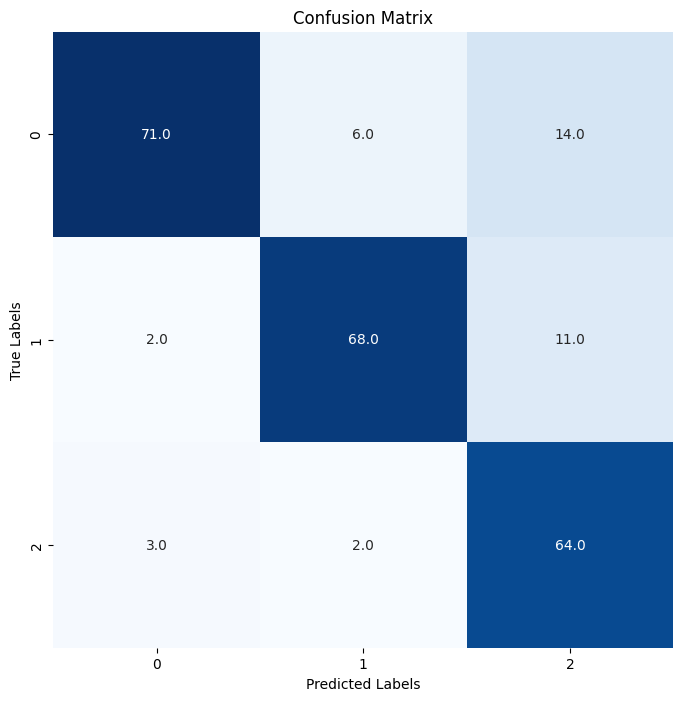

In [22]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
confusion_mtx = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='.1f', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

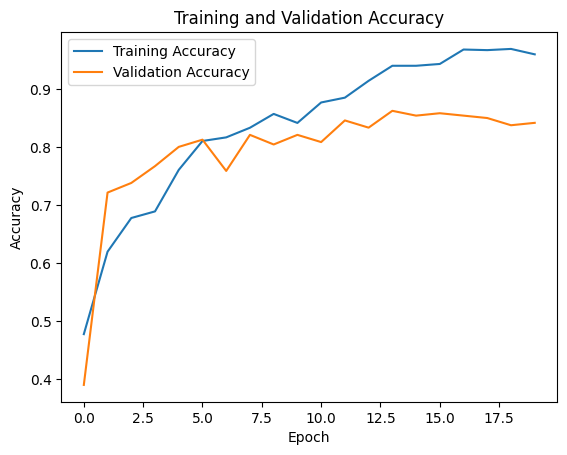

In [23]:
import matplotlib.pyplot as plt
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [24]:
import tensorflow as tf

In [25]:
tf.keras.models.save_model(model,'my_model.hdf5')

<ipython-input-25-5ffa4cf24db1>:1: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  tf.keras.models.save_model(model,'my_model.hdf5')


Shallow Network

In [26]:
from keras.models import Model
from keras.layers import Input, Dense, Flatten, Reshape

# Define input layer
input_img = Input(shape=(125, 125, 3))

# Flatten the input image
flat_img = Flatten()(input_img)

# Encoder
encoded = Dense(64, activation='relu')(flat_img)

# Decoder
decoded = Dense(125*125*3, activation='sigmoid')(encoded)

# Reshape the decoded output
decoded_img = Reshape((125, 125, 3))(decoded)

# Create autoencoder model
autoencoder = Model(input_img, decoded_img)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model
history = autoencoder.fit(x_train, x_train, epochs=20, batch_size=32, validation_data=(x_test, x_test))


Epoch 1/20
31/31 [==============================] - 5s 28ms/step - loss: 0.6736 - val_loss: 0.6590
Epoch 2/20
31/31 [==============================] - 0s 14ms/step - loss: 0.6611 - val_loss: 0.6571
Epoch 3/20
31/31 [==============================] - 0s 14ms/step - loss: 0.6578 - val_loss: 0.6509
Epoch 4/20
31/31 [==============================] - 0s 14ms/step - loss: 0.6536 - val_loss: 0.6513
Epoch 5/20
31/31 [==============================] - 1s 16ms/step - loss: 0.6528 - val_loss: 0.6482
Epoch 6/20
31/31 [==============================] - 0s 14ms/step - loss: 0.6489 - val_loss: 0.6445
Epoch 7/20
31/31 [==============================] - 0s 13ms/step - loss: 0.6472 - val_loss: 0.6464
Epoch 8/20
31/31 [==============================] - 0s 14ms/step - loss: 0.6460 - val_loss: 0.6440
Epoch 9/20
31/31 [==============================] - 0s 13ms/step - loss: 0.6451 - val_loss: 0.6438
Epoch 10/20
31/31 [==============================] - 0s 13ms/step - loss: 0.6462 - val_loss: 0.6487
Epoch 11/

In [27]:
#evaluate model
autoencoder.evaluate(x_test, x_test)

8/8 [==============================] - 0s 7ms/step - loss: 0.6425


0.6425107717514038

Deep Network

In [28]:
from keras.models import Model
from keras.layers import Input, Dense, Flatten, Reshape

# Define input layer
input_img = Input(shape=(125, 125, 3))

# Encoder
encoded = Flatten()(input_img)
encoded = Dense(256, activation='relu')(encoded)
encoded = Dense(128, activation='relu')(encoded)
encoded = Dense(64, activation='relu')(encoded)

# Decoder
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(256, activation='relu')(decoded)
decoded = Dense(125*125*3, activation='sigmoid')(decoded)

# Reshape the decoded output
decoded_img = Reshape((125, 125, 3))(decoded)

# Create autoencoder model
autoencoder = Model(input_img, decoded_img)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model
history = autoencoder.fit(x_train, x_train, epochs=20, batch_size=32, validation_data=(x_test, x_test))


Epoch 1/20
31/31 [==============================] - 3s 34ms/step - loss: 0.6724 - val_loss: 0.6720
Epoch 2/20
31/31 [==============================] - 1s 19ms/step - loss: 0.6625 - val_loss: 0.6531
Epoch 3/20
31/31 [==============================] - 1s 18ms/step - loss: 0.6558 - val_loss: 0.6534
Epoch 4/20
31/31 [==============================] - 1s 24ms/step - loss: 0.6524 - val_loss: 0.6489
Epoch 5/20
31/31 [==============================] - 1s 25ms/step - loss: 0.6528 - val_loss: 0.6531
Epoch 6/20
31/31 [==============================] - 1s 24ms/step - loss: 0.6479 - val_loss: 0.6447
Epoch 7/20
31/31 [==============================] - 1s 22ms/step - loss: 0.6449 - val_loss: 0.6436
Epoch 8/20
31/31 [==============================] - 1s 23ms/step - loss: 0.6426 - val_loss: 0.6476
Epoch 9/20
31/31 [==============================] - 1s 23ms/step - loss: 0.6428 - val_loss: 0.6422
Epoch 10/20
31/31 [==============================] - 1s 23ms/step - loss: 0.6404 - val_loss: 0.6372
Epoch 11/

In [29]:
#evaluate model
autoencoder.evaluate(x_test, x_test)

8/8 [==============================] - 0s 8ms/step - loss: 0.6289


0.6289268732070923

In [30]:
!pip install streamlit

In [76]:
%%writefile app.py
import streamlit as st
import tensorflow as tf

st.set_option('deprecation.showfileUploaderEncoding', False)

@st.cache(allow_output_mutation = True)
def load_model():
    model = tf.keras.models.load_model("/content/my_model.hdf5")
    return model
model = load_model()
st.title('Weed Detection App')
st.write("This app detects the common weed found in the Wheat fields of Pakistan.")

st.selectbox('Select Your Province', ["Punjab","Sindh","Balochistan", "KPK", "Azad Jammu and Kashmir", "Gilgit-Baltistan"])
st.camera_input("Please take the image of the field.")
st.write("or")
file = st.file_uploader('Upload the image of the field', type=['jpg','png','jpeg'])

import cv2
import PIL
from PIL import Image, ImageOps
import numpy as np
def import_and_predict(image_data, model):
    size = (125, 125)
    image = ImageOps.fit(image_data, size, Image.ANTIALIAS)
    img = np.asarray(image)
    img_reshape = img[np.newaxis, ...]
    prediction = model.predict(img_reshape)

    return prediction

if file is None:
    st.text("Pleas upload an image file")
else:
    image = Image.open(file)
    st.image(image, use_column_width = True)
    predictions = import_and_predict(image, model)
    class_name = ['Amaranthus viridian', 'Anagallius arvensis', 'Asphodelus tenuifolias']
    string = 'This image most likely is: '+class_name[np.argmax(predictions)]
    st.success(string)


Overwriting app.py


In [77]:
import urllib
print("Password/Enpoint IP for localtunnel is:",urllib.request.urlopen('https://ipv4.icanhazip.com').read().decode('utf8').strip("\n"))

Password/Enpoint IP for localtunnel is: 34.31.25.74


In [78]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
updated 1 package and audited 36 packages in 0.443s

3 packages are looking for funding
  run `npm fund` for details

found 2 moderate severity vulnerabilities
  run `npm audit fix` to fix them, or `npm audit` for details


In [79]:
!streamlit run app.py &>/content/logs.txt &

In [ ]:
!npx localtunnel --port 8501

npx: installed 22 in 2.064s
your url is: https://red-terms-return.loca.lt
